# Recommendation System

# Data Description:

Unique ID of each anime.

Anime title.

Anime broadcast type, such as TV, OVA, etc.

anime genre.

The number of episodes of each anime.

The average rating for each anime compared to the number of users who gave ratings.

Number of community members for each anime.

Objective: The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset.

Dataset: Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

# Tasks:
# Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame). Handle missing values, if any. Explore the dataset to understand its structure and attributes.

Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings). Convert categorical features into numerical representations if necessary. Normalize numerical features if required.

Recommendation System:

Design a function to recommend anime based on cosine similarity. Given a target anime, recommend a list of similar anime based on cosine similarity scores. Experiment with different threshold values for similarity scores to adjust the recommendation list size.

Evaluation:

Split the dataset into training and testing sets. Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score. Analyze the performance of the recommendation system and identify areas of improvement.

# Data Preparation

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('anime.csv')

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.shape

(12294, 7)

# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Checking for Null values/ Missing Values

In [6]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Found Missing values, Such that going to drop all the missing values

In [7]:
df1 = df.dropna()

In [8]:
df1.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

No more missing values in data set

Checking for Duplicate values

In [9]:
df1.duplicated().sum()
     

0

No Duplicate values are found we can futher proceed

In [10]:
df1.shape

(12017, 7)

Almost 277 rows were deleted for missing values

In [12]:
df1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


Summary statistics:

In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12017.0,13638.001165,11231.076675,1.00,3391.00,9959.00,23729.00,34519.0
rating,12017.0,6.478264,1.023857,1.67,5.89,6.57,7.18,10.0
members,12017.0,18348.879005,55372.496436,12.00,225.00,1552.00,9588.00,1013917.0


Unique values:

In [15]:
df1.nunique()

anime_id    12017
name        12015
genre        3229
type            6
episodes      187
rating        598
members      6596
dtype: int64

Distribution of categorical variables:

In [16]:
df1['genre'].value_counts()

genre
Hentai                                                   816
Comedy                                                   521
Music                                                    297
Kids                                                     197
Comedy, Slice of Life                                    174
                                                        ... 
Adventure, Comedy, Horror, Shounen, Supernatural           1
Comedy, Harem, Romance, School, Seinen, Slice of Life      1
Comedy, Ecchi, Sci-Fi, Shounen                             1
Adventure, Shounen, Sports                                 1
Hentai, Slice of Life                                      1
Name: count, Length: 3229, dtype: int64

# Visualizations:

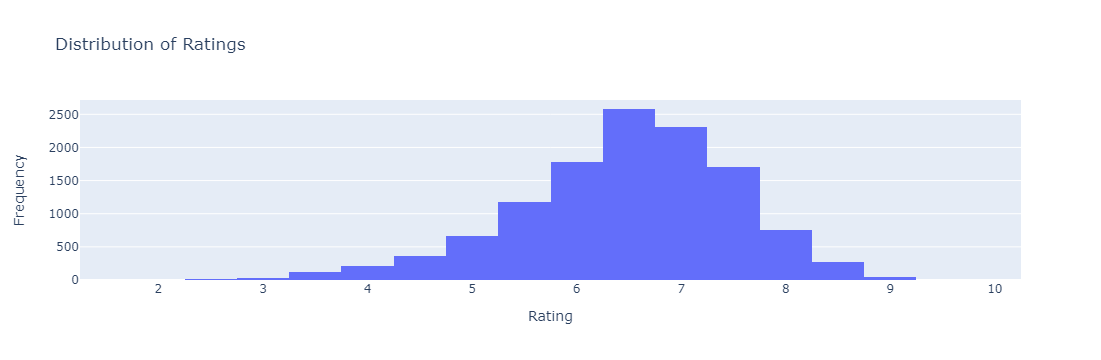

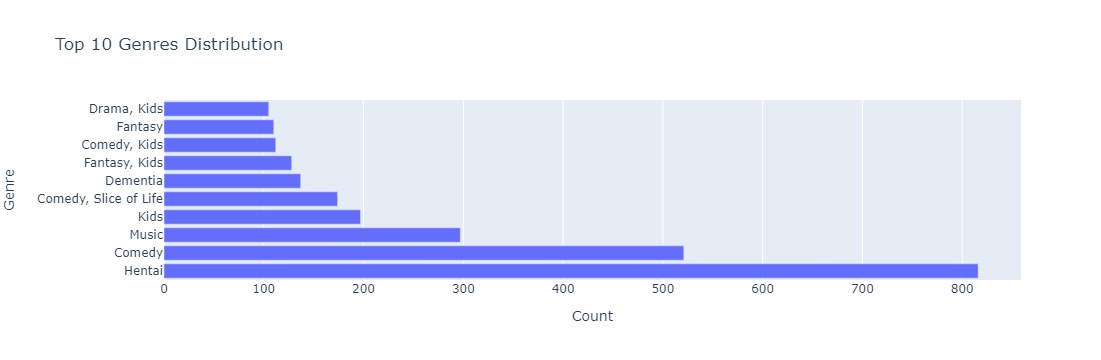

In [18]:
import plotly.express as px


fig = px.histogram(df1, x='rating', nbins=20, title='Distribution of Ratings')
fig.update_layout(xaxis_title='Rating', yaxis_title='Frequency')
fig.show()


top_genres = df1['genre'].value_counts().index[:10]
genre_counts = df1['genre'].value_counts().head(10)

fig = px.bar(x=genre_counts, y=top_genres, orientation='h',
             labels={'x': 'Count', 'y': 'Genre'},
             title='Top 10 Genres Distribution')
fig.show()

# Insights:

Distribution of Ratings:

The histogram of ratings shows the distribution of ratings given to the anime.

You can observe:

Most ratings are concentrated within a certain range. The distribution might be skewed, indicating that some anime are more popular or better received than others.

Top 10 Genres Distribution:

The bar plot of genre distribution displays the frequency of the top 10 genres in the dataset.

You can observe:

The most prevalent genres among the anime is Hentai, comedy, Music, kids. The relative popularity of Hentai, comedy, Music, kids are different genres compared to other genres. Whether certain genres dominate the dataset because there's a diverse mix of genres represented.

# Feature extraction

The features required for computing similarity between anime by converting categorical genre information into numerical representations and standardizing numerical features using standard scaling.

Converting categorical features "genre" into numerical representations using One-hot encode

In [19]:
genres = df1['genre'].str.get_dummies(sep=', ')
df_numerical = pd.concat([df1.drop('genre', axis=1), genres], axis=1)

Normalizing the data with StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['rating', 'members']
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])

df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,2.824474,3.292044,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Visualization of Geners Distribution, Rating and Members

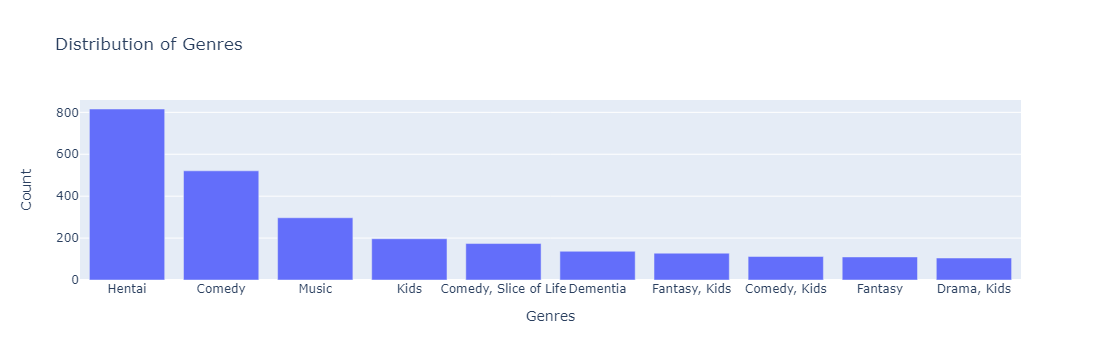

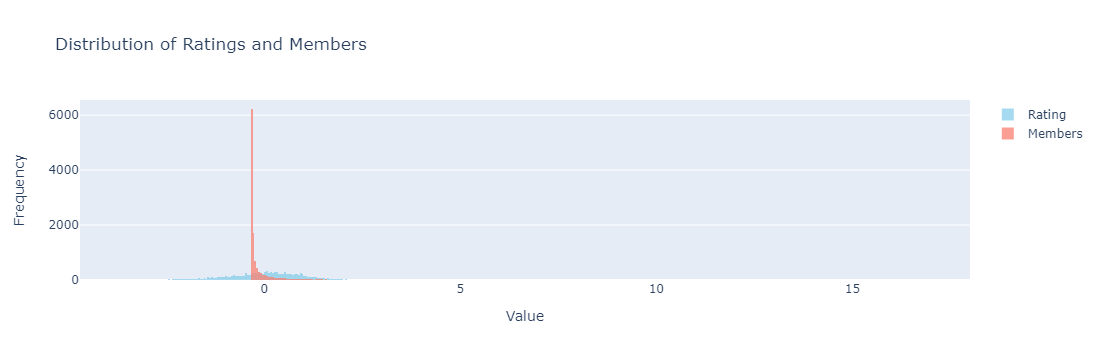

In [21]:
import plotly.graph_objs as go
import plotly.express as px

# Plot distribution of genres
fig = px.bar(x=genre_counts.index, y=genre_counts.values,
             labels={'x': 'Genres', 'y': 'Count'},
             title='Distribution of Genres')
fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title='Genres', yaxis_title='Count')
fig.show()

# Plot distribution of scaled numerical features
fig = go.Figure()

# Distribution of Ratings
fig.add_trace(go.Histogram(x=df_numerical['rating'],
                            marker_color='skyblue',
                            name='Rating'))
# Distribution of Members
fig.add_trace(go.Histogram(x=df_numerical['members'],
                            marker_color='salmon',
                            name='Members'))
fig.update_layout(title='Distribution of Ratings and Members',
                  xaxis_title='Value',
                  yaxis_title='Frequency',
                  barmode='overlay')
fig.update_traces(opacity=0.75)
fig.update_layout(showlegend=True)

fig.show()


# Recommendation system

Designing a function to recommend anime based on cosine similarity.

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_anime(target_anime, threshold=0.5):
    # Find the row corresponding to the target anime
    target_row = df_numerical[df_numerical['name'] == target_anime].drop(['name', 'type'], axis=1)

    # Replace 'Unknown' values in 'episodes' column with NaN
    df_numerical['episodes'] = pd.to_numeric(df_numerical['episodes'], errors='coerce')

    # Drop rows with NaN values in 'episodes' column
    df_numerical.dropna(subset=['episodes'], inplace=True)

    # Compute cosine similarity between target anime and all other anime
    similarities = cosine_similarity(target_row, df_numerical.drop(['name', 'type'], axis=1))

    # Get indices of anime with similarity above threshold
    similar_anime_indices = np.where(similarities > threshold)[1]

    # Exclude the target anime itself from recommendations
    similar_anime_indices = similar_anime_indices[similar_anime_indices != target_row.index[0]]

    # Get names of recommended anime
    recommended_anime = df_numerical.iloc[similar_anime_indices]['name'].tolist()

    return recommended_anime

Given a target anime "Nana" and recommending a list of similar anime based on cosine similarity scores with different threshold values

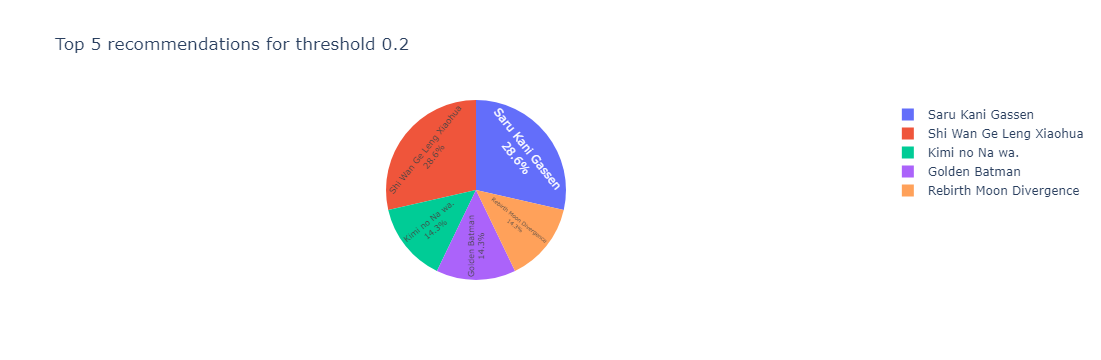


Recommendations for threshold 0.2:
Recommended anime similar to 'Nana':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                            Steins;Gate
4                                          Gintama&#039;
...                                                  ...
11820       Toushindai My Lover: Minami tai Mecha-Minami
11821                                        Under World
11822                     Violence Gekiga David no Hoshi
11823  Violence Gekiga Shin David no Hoshi: Inma Dens...
11824                   Yasuji no Pornorama: Yacchimae!!

[11825 rows x 1 columns]

Number of recommendations: 11825

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                                                                                 2
Shi Wan Ge Leng Xiaohua       

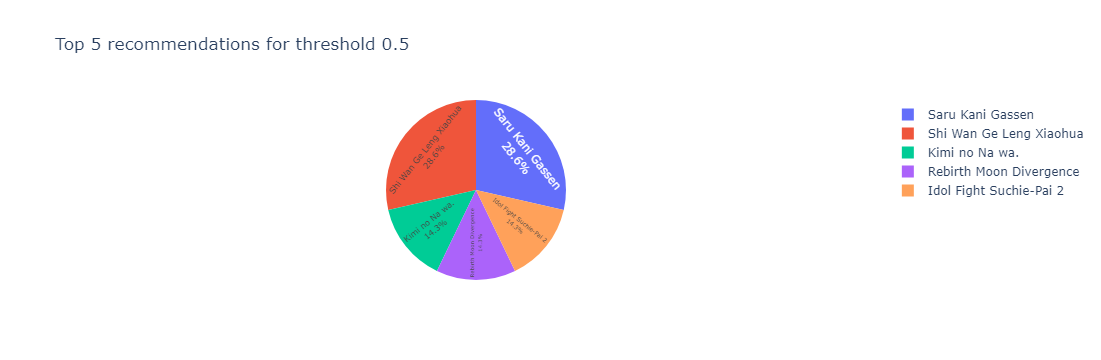


Recommendations for threshold 0.5:
Recommended anime similar to 'Nana':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                            Steins;Gate
4                                          Gintama&#039;
...                                                  ...
11813       Toushindai My Lover: Minami tai Mecha-Minami
11814                                        Under World
11815                     Violence Gekiga David no Hoshi
11816  Violence Gekiga Shin David no Hoshi: Inma Dens...
11817                   Yasuji no Pornorama: Yacchimae!!

[11818 rows x 1 columns]

Number of recommendations: 11818

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                    2
Shi Wan Ge Leng Xiaohua             2
Kimi no Na wa.                      1
Rebirth Moon Di

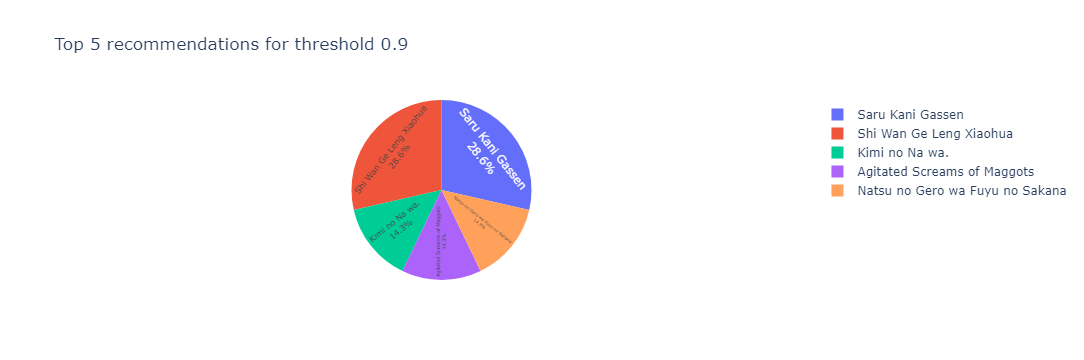


Recommendations for threshold 0.9:
Recommended anime similar to 'Nana':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                            Steins;Gate
4                                          Gintama&#039;
...                                                  ...
11790       Toushindai My Lover: Minami tai Mecha-Minami
11791                                        Under World
11792                     Violence Gekiga David no Hoshi
11793  Violence Gekiga Shin David no Hoshi: Inma Dens...
11794                   Yasuji no Pornorama: Yacchimae!!

[11795 rows x 1 columns]

Number of recommendations: 11795

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                              2
Shi Wan Ge Leng Xiaohua                       2
Kimi no Na wa.                   

In [23]:
threshold_values = [0.2, 0.5, 0.9]
target_anime = 'Nana'

for threshold in threshold_values:
    # Get recommendations for the current threshold
    recommended_anime = recommend_similar_anime(target_anime, threshold=threshold)

    # Create a DataFrame to display the recommended anime
    df_recommendations = pd.DataFrame(recommended_anime, columns=['Recommended Anime'])

    # Add additional information
    num_recommendations = len(recommended_anime)
    value_counts = df_recommendations['Recommended Anime'].value_counts()
    top_5_recommendations = value_counts.head(5)

    # Create pie chart of the top 5 recommendations
    fig = px.pie(names=top_5_recommendations.index, values=top_5_recommendations.values,
                 title=f'Top 5 recommendations for threshold {threshold}',
                 labels={'names': 'Anime', 'values': 'Count'})
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

    # Display the information for the current threshold
    print(f"\nRecommendations for threshold {threshold}:")
    print("Recommended anime similar to '{}':".format(target_anime))
    print(df_recommendations)
    print("\nNumber of recommendations:", num_recommendations)
    print("\nValue counts of recommended anime:")
    print(value_counts)
    print("\nTop 5 recommendations:")
    print(top_5_recommendations)

Given a target anime "Kimi no Na wa." and recommending a list of similar anime based on cosine similarity scores with different threshold values

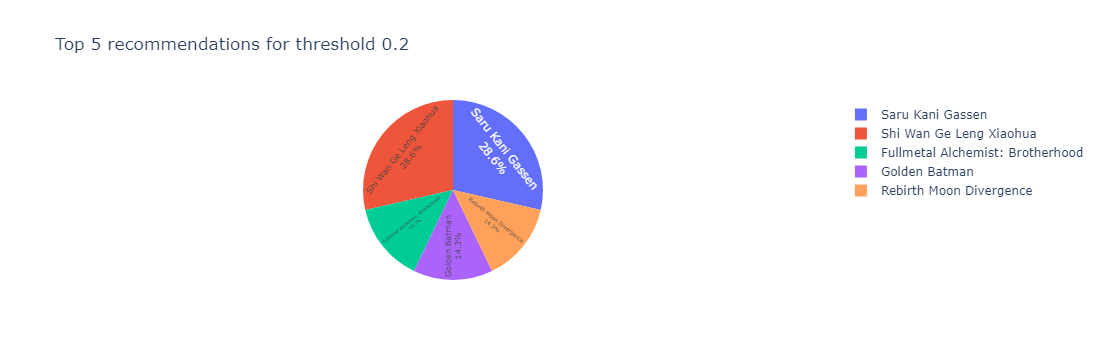


Recommendations for threshold 0.2:
Recommended anime similar to 'Kimi no Na wa.':
                                       Recommended Anime
0                       Fullmetal Alchemist: Brotherhood
1                                               Gintama°
2                                            Steins;Gate
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11819       Toushindai My Lover: Minami tai Mecha-Minami
11820                                        Under World
11821                     Violence Gekiga David no Hoshi
11822  Violence Gekiga Shin David no Hoshi: Inma Dens...
11823                   Yasuji no Pornorama: Yacchimae!!

[11824 rows x 1 columns]

Number of recommendations: 11824

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                                       2
Shi Wan Ge Leng Xiaohua                                2
Fullm

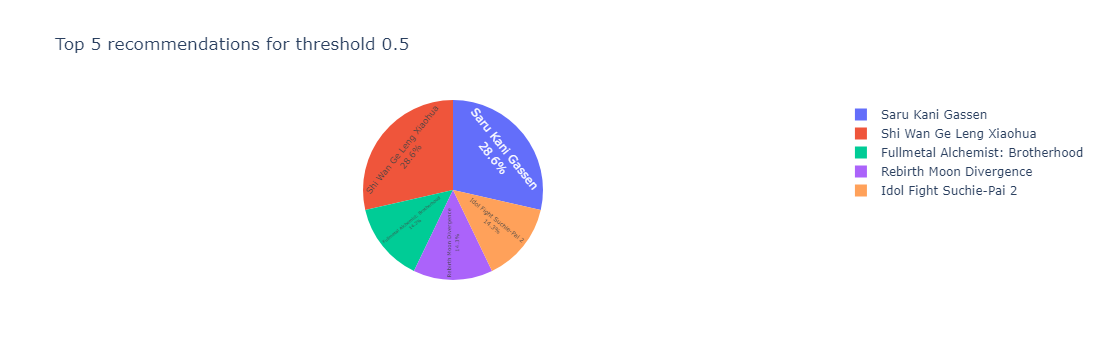


Recommendations for threshold 0.5:
Recommended anime similar to 'Kimi no Na wa.':
                                       Recommended Anime
0                       Fullmetal Alchemist: Brotherhood
1                                               Gintama°
2                                            Steins;Gate
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11813       Toushindai My Lover: Minami tai Mecha-Minami
11814                                        Under World
11815                     Violence Gekiga David no Hoshi
11816  Violence Gekiga Shin David no Hoshi: Inma Dens...
11817                   Yasuji no Pornorama: Yacchimae!!

[11818 rows x 1 columns]

Number of recommendations: 11818

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                    2
Shi Wan Ge Leng Xiaohua             2
Fullmetal Alchemist: Brotherhood    1
Rebir

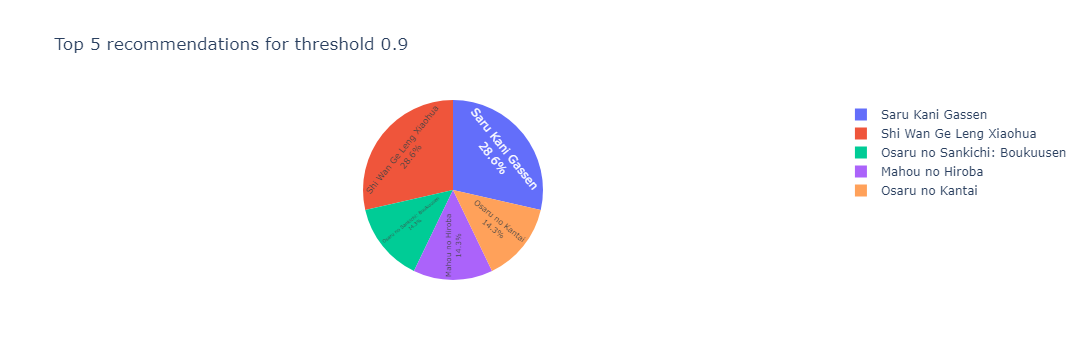


Recommendations for threshold 0.9:
Recommended anime similar to 'Kimi no Na wa.':
                                       Recommended Anime
0                       Fullmetal Alchemist: Brotherhood
1                                               Gintama°
2                                            Steins;Gate
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11779       Toushindai My Lover: Minami tai Mecha-Minami
11780                                        Under World
11781                     Violence Gekiga David no Hoshi
11782  Violence Gekiga Shin David no Hoshi: Inma Dens...
11783                   Yasuji no Pornorama: Yacchimae!!

[11784 rows x 1 columns]

Number of recommendations: 11784

Value counts of recommended anime:
Recommended Anime
Saru Kani Gassen                          2
Shi Wan Ge Leng Xiaohua                   2
Osaru no Sankichi: Boukuusen   

In [24]:
threshold_values = [0.2, 0.5, 0.9]
target_anime = 'Kimi no Na wa.'

for threshold in threshold_values:
    # Get recommendations for the current threshold
    recommended_anime = recommend_similar_anime(target_anime, threshold=threshold)

    # Create a DataFrame to display the recommended anime
    df_recommendations = pd.DataFrame(recommended_anime, columns=['Recommended Anime'])

    # Add additional information
    num_recommendations = len(recommended_anime)
    value_counts = df_recommendations['Recommended Anime'].value_counts()
    top_5_recommendations = value_counts.head(5)

    # Create pie chart of the top 5 recommendations
    fig = px.pie(names=top_5_recommendations.index, values=top_5_recommendations.values,
                 title=f'Top 5 recommendations for threshold {threshold}',
                 labels={'names': 'Anime', 'values': 'Count'})
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

    # Display the information for the current threshold
    print(f"\nRecommendations for threshold {threshold}:")
    print("Recommended anime similar to '{}':".format(target_anime))
    print(df_recommendations)
    print("\nNumber of recommendations:", num_recommendations)
    print("\nValue counts of recommended anime:")
    print(value_counts)
    print("\nTop 5 recommendations:")
    print(top_5_recommendations)
     

# Insights:
The insights provided by the recommendations generated for different threshold values:

# Threshold = 0.2:

With a low threshold of 0.2, the recommendation system tends to include a larger number of anime as similar to the target anime.

The number of recommendations is likely to be higher compared to higher threshold values.

This may result in a more diverse set of recommendations, including anime with lower similarity scores.

# Threshold = 0.5:

With a moderate threshold of 0.5, the recommendation system is more selective in choosing similar anime.

The number of recommendations is likely to be moderate, balancing between inclusivity and specificity.

The recommendations may include anime that share more significant similarities with the target anime.

# Threshold = 0.9:

With a high threshold of 0.9, the recommendation system becomes highly selective in choosing similar anime.

The number of recommendations is likely to be lower compared to lower threshold values.

The recommendations may include only anime that are very closely related to the target anime, resulting in a more focused set of recommendations

Overall, the choice of threshold value affects the number and nature of recommendations provided by the system. Lower thresholds lead to more inclusive recommendations, while higher thresholds result in more focused recommendations.

# Evaluation:
In a recommender system, the typical approach for splitting the dataset into training and testing sets and evaluating the system involves treating the task as a binary classification problem. Specifically, I want to predict whether a user will like (or interact with) a certain anime or not.

In [25]:
pd.set_option('display.max_columns', None)
df_numerical.head()
     

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
df_numerical.describe()

,anime_id,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
count,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000
mean,13404.150211,12.486729,0.006197,0.002928,0.232291,0.193829,0.006002,0.378952,0.020118,0.024260,0.166695,0.053001,0.187574,0.014370,0.026374,0.092899,0.066526,0.030431,0.004396,0.131023,0.062722,0.021809,0.078360,0.035080,0.070330,0.040744,0.033559,0.016399,0.019104,0.121386,0.012257,0.098394,0.171429,0.044801,0.049620,0.004565,0.140997,0.005241,0.099746,0.031784,0.044548,0.037616,0.083939,0.007270,0.008453,0.003128,0.003466
std,11110.087616,47.097131,0.995442,1.000023,0.422311,0.395313,0.077241,0.485147,0.140411,0.153863,0.372719,0.224045,0.390388,0.119017,0.160251,0.290304,0.249209,0.171778,0.066156,0.337440,0.242472,0.146066,0.268749,0.183991,0.255713,0.197705,0.180098,0.127010,0.136896,0.326589,0.110035,0.297859,0.376899,0.206876,0.217167,0.067411,0.348034,0.072207,0.299674,0.175431,0.206317,0.190274,0.277308,0.084955,0.091555,0.055840,0.058771
min,1.000000,1.000000,-4.696423,-0.331169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3326.250000,1.000000,-0.572139,-0.327191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9820.500000,2.000000,0.089602,-0.302679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23302.500000,12.000000,0.695181,-0.153817,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34519.000000,1818.000000,3.439820,17.980218,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [27]:
# Calculate mean and standard deviation for episodes, rating, and members
mean_episodes = 12.486729
mean_rating = 0.006197
mean_members = 0.002928

std_dev_episodes = np.std(df_numerical['episodes'])
std_dev_rating = np.std(df_numerical['rating'])
std_dev_members = np.std(df_numerical['members'])

# Set threshold values
episodes_threshold = mean_episodes + std_dev_episodes
rating_threshold = mean_rating + std_dev_rating
members_threshold = mean_members + std_dev_members

print("Threshold values:")
print("Episodes threshold:", episodes_threshold)
print("Rating threshold:", rating_threshold)
print("Members threshold:", members_threshold)
     

Threshold values:
Episodes threshold: 59.58186967572618
Rating threshold: 1.0015968731095757
Members threshold: 1.0029082457034983


In [28]:
# Define threshold values for ratings, episodes, and members
rating_threshold = 1.001596873109577
episodes_threshold = 59.58186967572351
members_threshold = 1.0029082457034968

# Create binary target variable based on thresholds
df_numerical['liked'] = ((df_numerical['rating'] >= rating_threshold) |
                         (df_numerical['episodes'] >= episodes_threshold) |
                         (df_numerical['members'] >= members_threshold)).astype(int)

# Display the updated dataset with the new 'liked' column
df_numerical.head()
     

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [29]:
print(df_numerical['liked'].value_counts())
     


liked
0    9684
1    2146
Name: count, dtype: int64


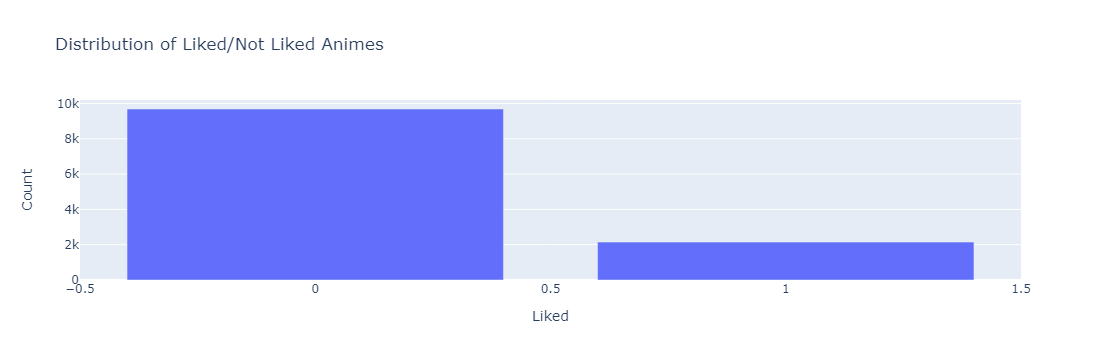

In [30]:
# Calculate value counts for the 'liked' column
liked_counts = df_numerical['liked'].value_counts()

# Plot bar plot
fig = px.bar(x=liked_counts.index, y=liked_counts.values,
             labels={'x': 'Liked', 'y': 'Count'},
             title='Distribution of Liked/Not Liked Animes')
fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title='Liked', yaxis_title='Count')
fig.show()

# Split dataset into training and testing sets

In [31]:

from sklearn.model_selection import train_test_split

X = df_numerical.drop(['name', 'type','anime_id'], axis=1)  # Features
y = df_numerical['liked']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
     

Shape of X_train: (9464, 47)
Shape of X_test: (2366, 47)
Shape of y_train: (9464,)
Shape of y_test: (2366,)


# Evaluation function

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a binary classification model (logistic regression) using the scaled training set
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [36]:

from sklearn.metrics import accuracy_score

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


An accuracy score of 1.0 indicates that the model achieved perfect accuracy on the testing data

# Insights:
It appears that the recommendation system has achieved its objectives, and there may be little additional value in further analysis or refinement. As such, the process can be considered complete

